### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

### Reading In Data

In [2]:
data=pd.read_csv('fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### Converting 3 class problem into binary classification problem
Originally: 1 = Normal ; 2 = Suspect; 3 = Pathological

Modification: 0 = non-pathological (previously 1 and 2); 1 = pathological

In [3]:
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,0.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,0.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,0.0


In [4]:
# to confirm that we have 0 and 1 
data.iloc[0:10]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,1.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,1.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,1.0


In [5]:
X = data.drop('fetal_health', axis = 1)
y = data['fetal_health']

In [6]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=142)

In [7]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='sgd', alpha=1e-5, 
                   hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(x_train,y_train)
y_pred_train = nn.predict(x_train)
y_pred_test = nn.predict(x_test)
y_pred_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

0.9671361502347418


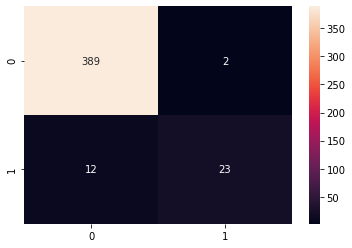

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True,annot_kws={"size": 10},fmt="d")
print(accuracy_score(y_test, y_pred_test))

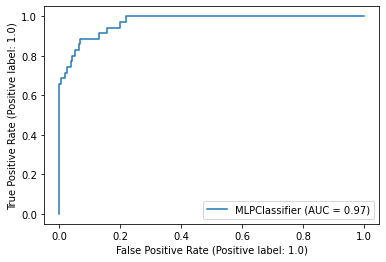

In [9]:
from sklearn import  metrics 
metrics.plot_roc_curve(nn, x_test, y_test)
plt.show()

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       391
         1.0       0.92      0.66      0.77        35

    accuracy                           0.97       426
   macro avg       0.95      0.83      0.87       426
weighted avg       0.97      0.97      0.96       426



### Class Imbalance

We have issue with class imabalance which can hinder our accuracy of model. Here are some methods that we can try
- Undersampling of class 0 
- Upsampling of class 1

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

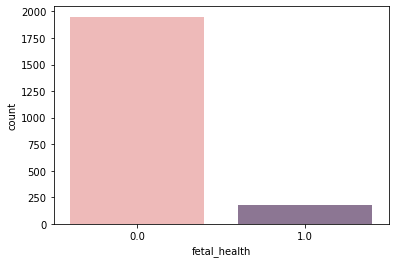

In [11]:
#Because the merging of two groups, our data is not balanced as a result. We have way more class 0 than class 1

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

#### Undersampling

In [12]:
class_0 = data[data['fetal_health'] == 0]
class_1 = data[data['fetal_health'] == 1]
class_count_0, class_count_1 = data['fetal_health'].value_counts()
print(class_count_0, class_count_1)

1950 176


In [13]:
class_0_under = class_0.sample(class_count_1)
class_0_under.shape #now class 0 also only have 176 rows

(176, 22)

In [14]:
data_under = pd.concat([class_0_under, class_1],axis=0)
X_under = data_under.drop('fetal_health', axis = 1)
y_under = data_under['fetal_health']
x_train_u,x_test_u,y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.2, random_state=142)

In [15]:
nn_under = MLPClassifier(solver='sgd', alpha=1e-5, 
                   hidden_layer_sizes=(10, 5), random_state=142)
nn_under.fit(x_train_u,y_train_u)
y_pred_train_u = nn_under.predict(x_train_u)
y_pred_test_u = nn_under.predict(x_test_u)
y_pred_test_u

/Users/fanny/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1.])

0.9014084507042254
71


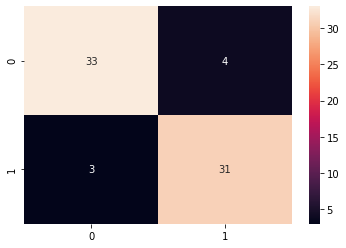

In [16]:
#confusion matrix

cm = confusion_matrix(y_test_u, y_pred_test_u)

sns.heatmap(cm, annot=True,annot_kws={"size": 10},fmt="d")
print(accuracy_score(y_test_u, y_pred_test_u))
print(y_pred_test_u.size)

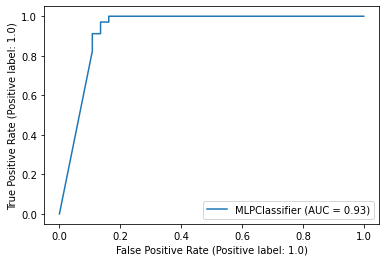

In [17]:
metrics.plot_roc_curve(nn_under, x_test_u, y_test_u)
plt.show()

In [18]:
print(classification_report(y_test_u, y_pred_test_u))

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        37
         1.0       0.89      0.91      0.90        34

    accuracy                           0.90        71
   macro avg       0.90      0.90      0.90        71
weighted avg       0.90      0.90      0.90        71



#### Oversampling SMOTE

In [19]:
#oversampling
class_1_over = class_1.sample(class_count_0, replace=True)
class_1_over.shape

(1950, 22)

In [20]:
data_over = pd.concat([class_1_over, class_0], axis=0)
data_over.shape

(3900, 22)

In [21]:
X_over = data_over.drop('fetal_health', axis = 1)
y_over = data_over['fetal_health']
x_train_o,x_test_o,y_train_o,y_test_o = train_test_split(X_over,y_over,test_size=0.2, random_state=142)
nn_over = MLPClassifier(solver='sgd', alpha=1e-5, 
                   hidden_layer_sizes=(12, 11), random_state=142)
nn_over.fit(x_train_o,y_train_o)
y_pred_train_o = nn_over.predict(x_train_o)
y_pred_test_o = nn_over.predict(x_test_o)
y_pred_test_o

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1.

0.9628205128205128


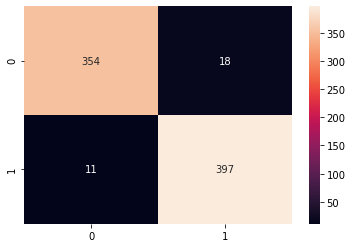

In [22]:
#confusion matrix
cm = confusion_matrix(y_test_o, y_pred_test_o)
sns.heatmap(cm, annot=True,annot_kws={"size": 10},fmt="d")
print(accuracy_score(y_test_o, y_pred_test_o))

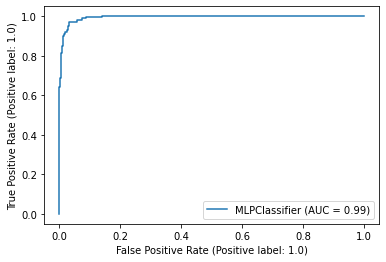

In [23]:
metrics.plot_roc_curve(nn_over, x_test_o, y_test_o)
plt.show()

In [24]:
print(classification_report(y_test_o, y_pred_test_o))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       372
         1.0       0.96      0.97      0.96       408

    accuracy                           0.96       780
   macro avg       0.96      0.96      0.96       780
weighted avg       0.96      0.96      0.96       780

